In [81]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import scipy
import scipy.stats as ss
import random

In [82]:
df = pd.read_csv('OnlineRetail4.csv', encoding='latin1')

In [83]:
print(df.shape)

(10050, 11)


In [84]:
columns = list(df.columns)
print(columns)

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'IsPromotion', 'Sex', 'Region']


In [85]:
print(df.head())

   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID         Country IsPromotion     Sex Region  
0       95496       Australia          No  Female  South  
1       56057       Australia         Yes  Female  South  
2       55855       Australia          No  Female   East  
3       34631          Canada         Yes  Female  South  
4       46774  United Kingdom         Yes  Female   West  


In [86]:
print(df.describe())

           InvoiceNo     StockCode      Quantity     UnitPrice    CustomerID
count   10050.000000   9949.000000  10050.000000  10050.000000  10050.000000
mean   498198.748060  54819.130666     10.429254     25.250154  50171.184378
std    285932.859864  26015.765162      5.729795     14.296773  28885.461369
min       153.000000  10010.000000      1.000000      0.510000     15.000000
25%    250595.250000  32462.000000      5.000000     12.882500  25096.000000
50%    499490.000000  54819.000000     10.000000     25.205000  50394.000000
75%    742142.500000  77456.000000     15.000000     37.570000  75380.750000
max    999892.000000  99973.000000     20.000000     50.000000  99988.000000


In [87]:
new_df = df
print(new_df.isnull().sum())
print("Missing values in distribution:")
print(new_df.isnull().mean())

InvoiceNo        0
StockCode      101
Description     12
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
IsPromotion      0
Sex              0
Region           0
dtype: int64
Missing values in distribution:
InvoiceNo      0.000000
StockCode      0.010050
Description    0.001194
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
IsPromotion    0.000000
Sex            0.000000
Region         0.000000
dtype: float64


In [88]:
print(new_df.duplicated().any()) 
print(new_df.duplicated())
print(new_df.shape) 

True
0        False
1        False
2        False
3        False
4        False
         ...  
10045    False
10046    False
10047    False
10048    False
10049    False
Length: 10050, dtype: bool
(10050, 11)


In [89]:
print("Column datatypes: ")
print(new_df.dtypes)

Column datatypes: 
InvoiceNo        int64
StockCode      float64
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
IsPromotion     object
Sex             object
Region          object
dtype: object


In [90]:
new_df["Country"] = new_df["Country"].replace({"United Kingdom":"UK", "France":"FR"}) 
print(new_df.head())
print(new_df.shape) 

   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID    Country IsPromotion     Sex Region  
0       95496  Australia          No  Female  South  
1       56057  Australia         Yes  Female  South  
2       55855  Australia          No  Female   East  
3       34631     Canada         Yes  Female  South  
4       46774         UK         Yes  Female   West  
(10050, 11)


In [91]:
print(new_df["CustomerID"].unique()) 

[95496 56057 55855 ... 89766 87345 91752]


In [92]:
new_df['Description'] = new_df['Description'].replace({'WHITE HANGING HEART': '000',
                                                       'HAND WARMER UNION JACK': '111',
                                                       'BOX OF VINTAGE 787': '2',
                                                       'ALARM CLOCK 868': '3'})

print(new_df.head())

   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID    Country IsPromotion     Sex Region  
0       95496  Australia          No  Female  South  
1       56057  Australia         Yes  Female  South  
2       55855  Australia          No  Female   East  
3       34631     Canada         Yes  Female  South  
4       46774         UK         Yes  Female   West  


In [93]:
print(new_df.shape) 
print(new_df.head())

(10050, 11)
   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID    Country IsPromotion     Sex Region  
0       95496  Australia          No  Female  South  
1       56057  Australia         Yes  Female  South  
2       55855  Australia          No  Female   East  
3       34631     Canada         Yes  Female  South  
4       46774         UK         Yes  Female   West  


-------------------------------------------------------------------

Figure(1000x400)


<Axes: xlabel='UnitPrice'>

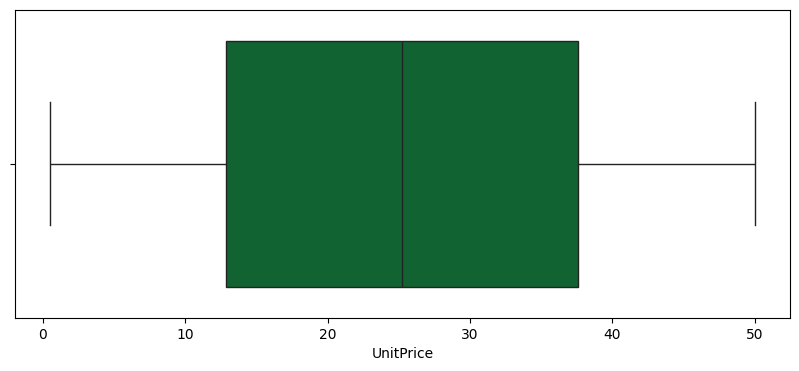

In [94]:
df2 = df
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "UnitPrice", data = df2)

<Axes: xlabel='Country', ylabel='count'>

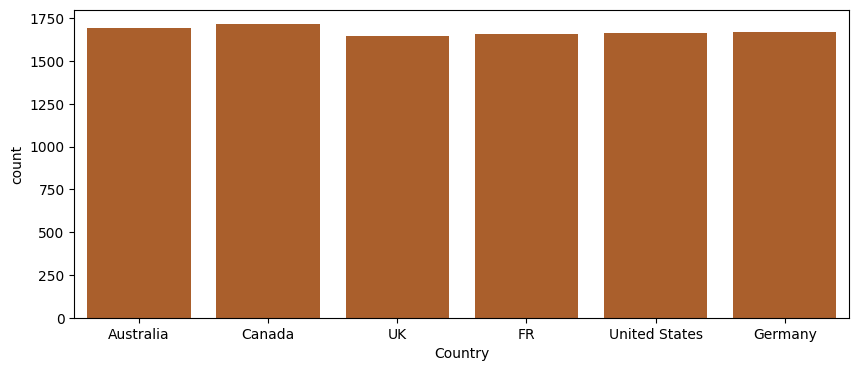

In [95]:
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("Accent_r") 
sns.set_palette(color_palette)
sns.countplot(x = "Country", data = df2)

<Axes: xlabel='IsPromotion', ylabel='count'>

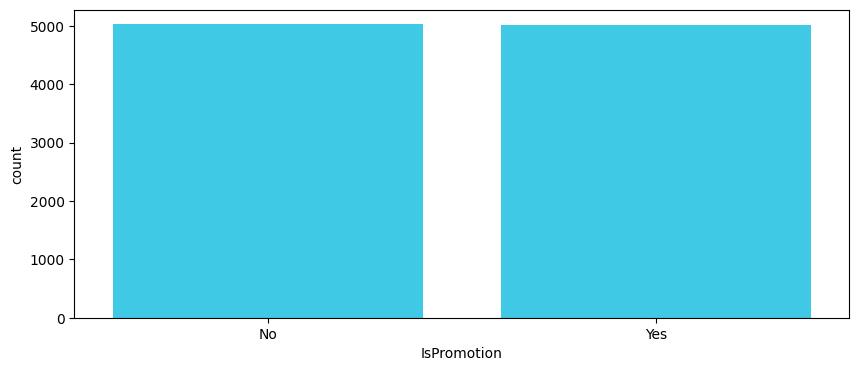

In [96]:
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("cool")
 
sns.set_palette(color_palette) 
sns.countplot(x = "IsPromotion", data = df2) 

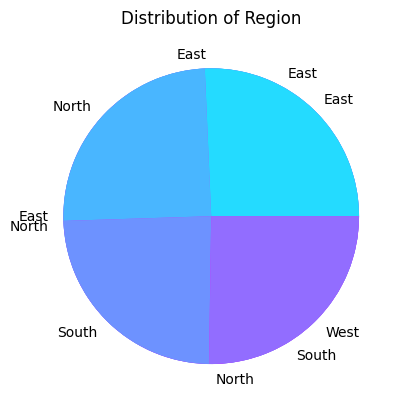

In [97]:
grp = dict(df2.groupby('Region').groups) 
m = {}
for key, val in grp.items(): 
    if key in m:
        m[key] += len(val) 
    else:
        m[key] = len(val) 
        plt.title("Distribution of Region") 
        plt.pie(m.values(), labels = m.keys())

<Axes: xlabel='Sex', ylabel='count'>

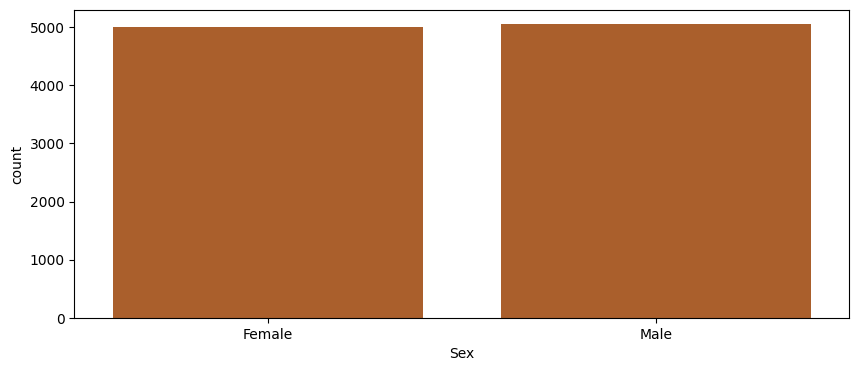

In [98]:
plt.figure(figsize = (10, 4), dpi = 100)
color_palette = sns.color_palette("Accent_r") 
sns.set_palette(color_palette)
sns.countplot(x = "Sex", data = df2)

<Axes: xlabel='Region', ylabel='Country'>

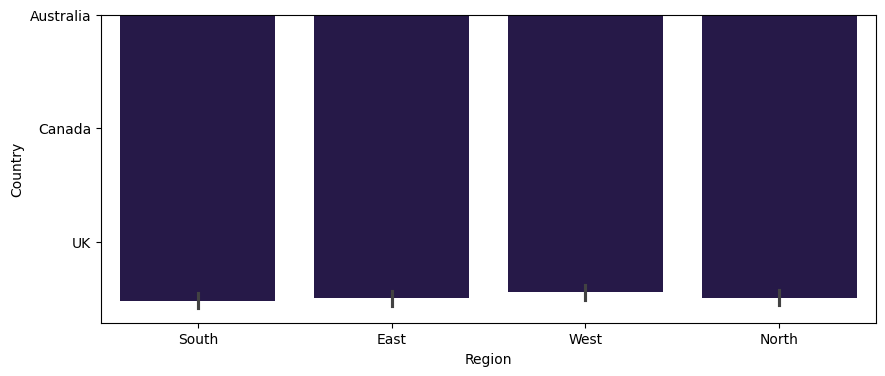

In [99]:
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("magma") 
sns.set_palette(color_palette)
sns.barplot(x = "Region", y = "Country", data = df2) 

<Axes: xlabel='Region', ylabel='Country'>

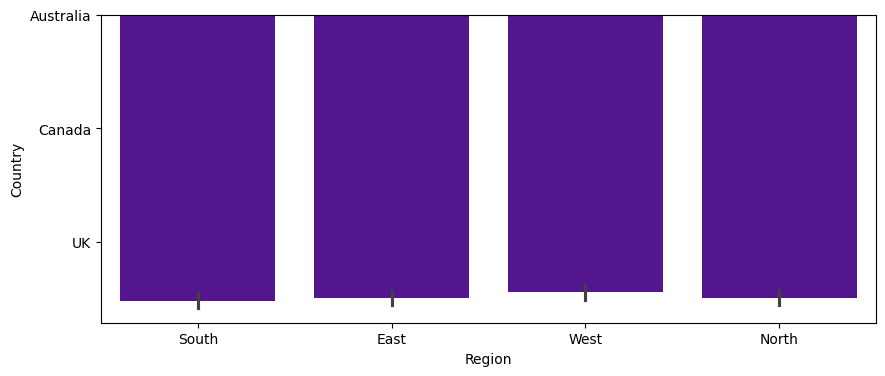

In [100]:
plt.figure(figsize = (10, 4), dpi = 100) 
color_palette = sns.color_palette("plasma") 
sns.set_palette(color_palette)
 
sns.barplot(x = "Region", y = "Country", data = df2) 

<Axes: xlabel='Sex', ylabel='IsPromotion'>

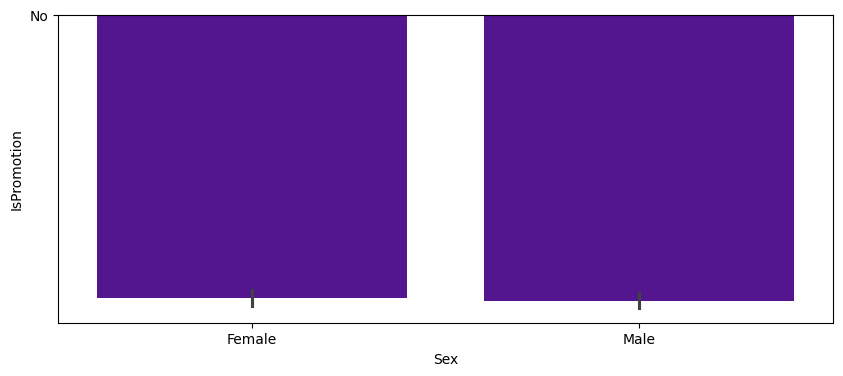

In [101]:
df2["IsPromotion"].replace({"yes":1, "no":0}, inplace = True) 
plt.figure(figsize = (10, 4), dpi = 100)
color_palette = sns.color_palette("plasma") 
sns.set_palette(color_palette)
sns.barplot(x = "Sex", y = "IsPromotion", data = df2) 

<Axes: xlabel='IsPromotion', ylabel='count'>

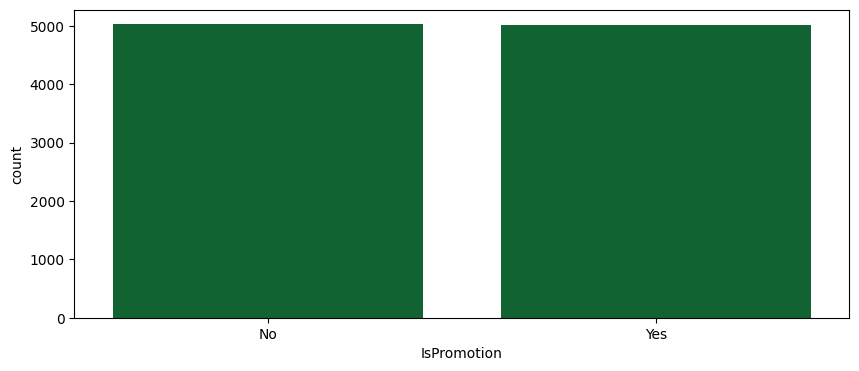

In [102]:
df2["IsPromotion"].replace({1:"yes", 0:"no"}, inplace = True) 
plt.figure(figsize = (10, 4), dpi = 100)
color_palette = sns.color_palette("BuGn_r") 
sns.set_palette(color_palette) 
sns.countplot(x = "IsPromotion", data = df2)

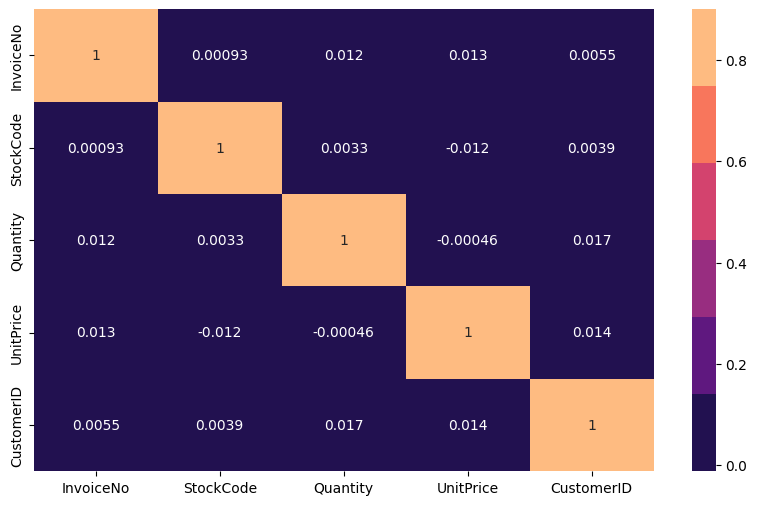

In [103]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
color = sns.color_palette("magma")
sns.heatmap(correlation_matrix, vmax=0.9, annot=True, cmap=color)
plt.show()

------------------------------------------------------------------

In [104]:
df1 = df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10050 non-null  int64  
 1   StockCode    9949 non-null   float64
 2   Description  10038 non-null  object 
 3   Quantity     10050 non-null  int64  
 4   InvoiceDate  10050 non-null  object 
 5   UnitPrice    10050 non-null  float64
 6   CustomerID   10050 non-null  int64  
 7   Country      10050 non-null  object 
 8   IsPromotion  10050 non-null  object 
 9   Sex          10050 non-null  object 
 10  Region       10050 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 863.8+ KB


Figure(1000x400)


<Axes: xlabel='UnitPrice'>

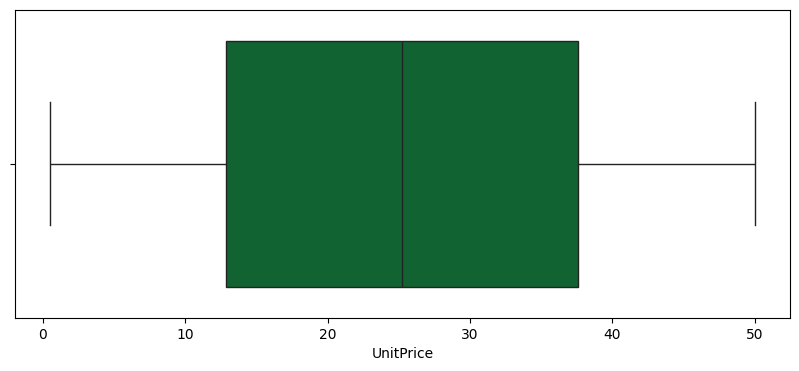

In [105]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "UnitPrice", data = df1) 

Figure(1000x400)


<Axes: xlabel='StockCode'>

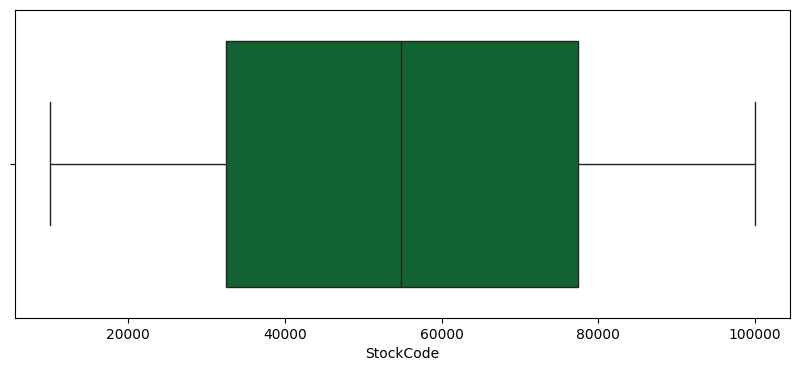

In [106]:
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "StockCode", data = df1) 

In [107]:
percentile25 = df1['StockCode'].quantile(0.25)
percentile75 = df1['StockCode'].quantile(0.75)
iqr = percentile75 - percentile25

In [108]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [109]:
df1[df1['StockCode'] > upper_limit]
df1[df1['StockCode'] < lower_limit]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region


In [110]:
new_df = df1[df1['StockCode'] < upper_limit]
new_df.shape

(9949, 11)

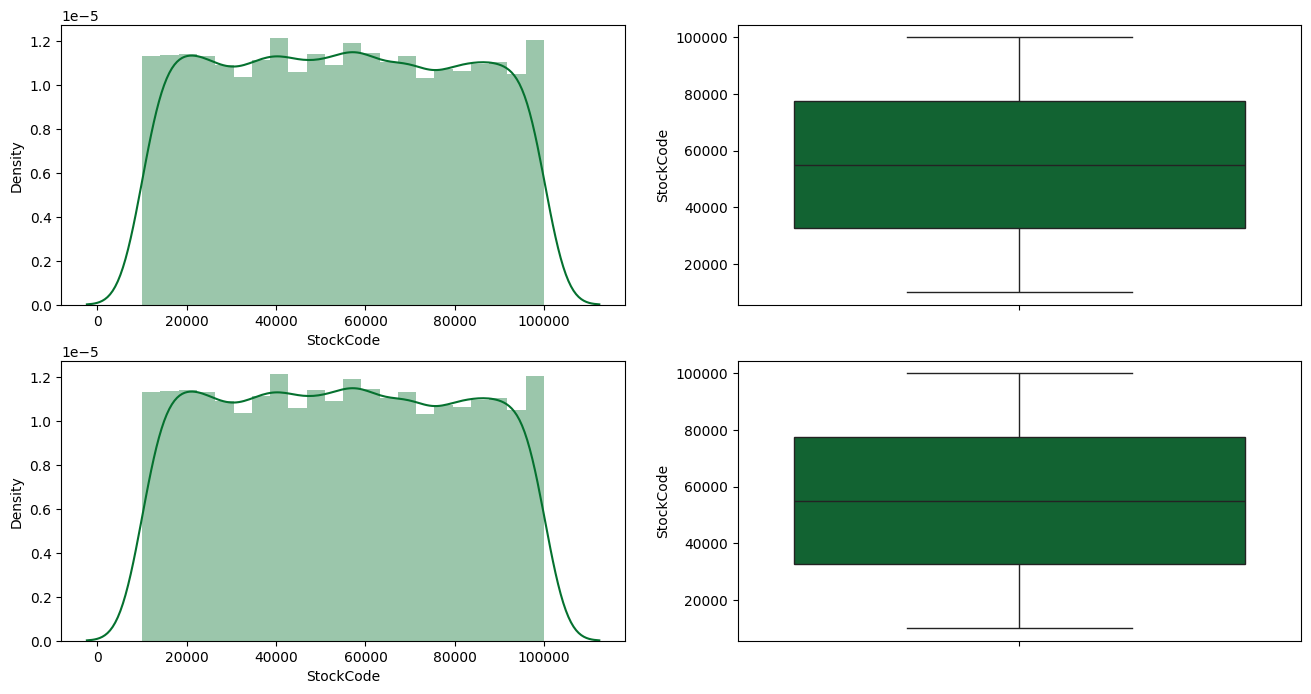

In [111]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['StockCode'])
plt.subplot(2,2,2)
sns.boxplot(df1['StockCode'])
plt.subplot(2,2,3)
sns.distplot(new_df['StockCode'])
plt.subplot(2,2,4)
sns.boxplot(new_df['StockCode'])
plt.show()

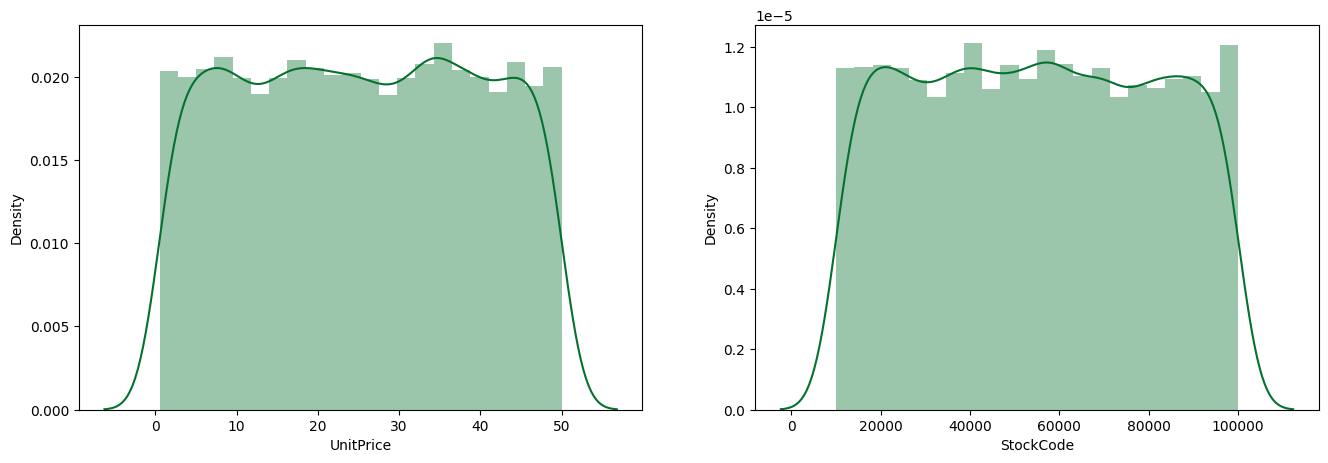

In [112]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['UnitPrice'])
plt.subplot(1,2,2)
sns.distplot(df1['StockCode'])
plt.show()

In [113]:
print("Highest allowed",df1['StockCode'].mean() + 3*df1['StockCode'].std())
print("Lowest allowed",df1['StockCode'].mean() - 3*df1['StockCode'].std())

Highest allowed 132866.42615364445
Lowest allowed -23228.16482084719


In [114]:
df1[(df1['StockCode'] > 48.95) | (df1['StockCode'] < 12.368)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region
0,370859,44142.0,Remain,3,31/08/2023 13:21,28.08,95496,Australia,No,Female,South
1,455672,37036.0,Officer,19,18/11/2023 21:10,38.73,56057,Australia,Yes,Female,South
2,824795,69973.0,Program,11,03/07/2023 06:52,20.50,55855,Australia,No,Female,East
3,490051,96135.0,Simple,10,06/12/2023 10:04,46.28,34631,Canada,Yes,Female,South
4,549040,24211.0,Particularly,10,23/02/2024 15:18,7.54,46774,UK,Yes,Female,West
...,...,...,...,...,...,...,...,...,...,...,...
10045,861140,20472.0,Current,12,03/11/2023 17:16,16.49,68916,FR,Yes,Male,West
10046,667156,38392.0,All,2,31/12/2023 09:24,16.28,91991,UK,No,Male,East
10047,550005,82248.0,Though,6,27/07/2023 05:04,33.38,89766,United States,No,Male,West
10048,982069,23938.0,Lawyer,14,10/10/2023 01:46,47.46,87345,Germany,No,Female,West


In [115]:
new_df1 = df1[(df1['StockCode'] < 1000000) & (df1['StockCode'] > 10000)]
new_df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region
0,370859,44142.0,Remain,3,31/08/2023 13:21,28.08,95496,Australia,No,Female,South
1,455672,37036.0,Officer,19,18/11/2023 21:10,38.73,56057,Australia,Yes,Female,South
2,824795,69973.0,Program,11,03/07/2023 06:52,20.50,55855,Australia,No,Female,East
3,490051,96135.0,Simple,10,06/12/2023 10:04,46.28,34631,Canada,Yes,Female,South
4,549040,24211.0,Particularly,10,23/02/2024 15:18,7.54,46774,UK,Yes,Female,West
...,...,...,...,...,...,...,...,...,...,...,...
10045,861140,20472.0,Current,12,03/11/2023 17:16,16.49,68916,FR,Yes,Male,West
10046,667156,38392.0,All,2,31/12/2023 09:24,16.28,91991,UK,No,Male,East
10047,550005,82248.0,Though,6,27/07/2023 05:04,33.38,89766,United States,No,Male,West
10048,982069,23938.0,Lawyer,14,10/10/2023 01:46,47.46,87345,Germany,No,Female,West


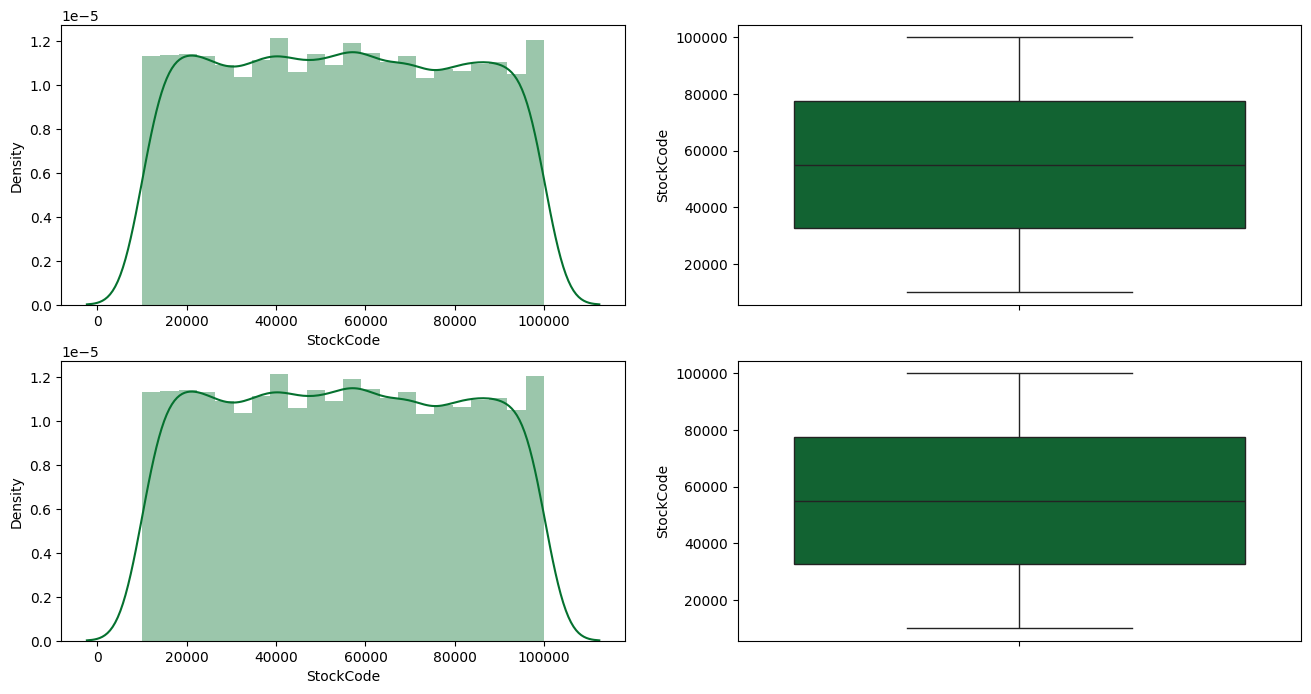

In [116]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['StockCode'])
plt.subplot(2,2,2)
sns.boxplot(df1['StockCode'])
plt.subplot(2,2,3)
sns.distplot(new_df1['StockCode'])
plt.subplot(2,2,4)
sns.boxplot(new_df1['StockCode'])
plt.show()

----------------------------------------------------------------------

In [117]:
ct_test = pd.read_csv('OnlineRetail4.csv') 
print(ct_test.shape)
ct_test.head()

(10050, 11)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region
0,370859,44142.0,Remain,3,31/08/2023 13:21,28.08,95496,Australia,No,Female,South
1,455672,37036.0,Officer,19,18/11/2023 21:10,38.73,56057,Australia,Yes,Female,South
2,824795,69973.0,Program,11,03/07/2023 06:52,20.50,55855,Australia,No,Female,East
3,490051,96135.0,Simple,10,06/12/2023 10:04,46.28,34631,Canada,Yes,Female,South
4,549040,24211.0,Particularly,10,23/02/2024 15:18,7.54,46774,United Kingdom,Yes,Female,West


In [118]:
mean_rate = ct_test['InvoiceNo'].mean()


# ddof is the degrees of freedom correction 
# in the calculation of the standard deviation;
# for population standard deviation ddof=0
stdev_rate = ct_test['InvoiceNo'].std(ddof=0)


In [119]:
print('Mean participation rate is {:.3f}'.format(mean_rate))
print('Standard deviation is {:.3f}'.format(stdev_rate))

Mean participation rate is 498198.748
Standard deviation is 285918.634


In [120]:
zscore_rate = ss.zscore(ct_test['InvoiceNo'], ddof=0)
ct_test = ct_test.assign(zscore=zscore_rate)
ct_test.head(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region,zscore
0,370859,44142.0,Remain,3,31/08/2023 13:21,28.08,95496,Australia,No,Female,South,-0.445371
1,455672,37036.0,Officer,19,18/11/2023 21:10,38.73,56057,Australia,Yes,Female,South,-0.148737
2,824795,69973.0,Program,11,03/07/2023 06:52,20.50,55855,Australia,No,Female,East,1.142270
3,490051,96135.0,Simple,10,06/12/2023 10:04,46.28,34631,Canada,Yes,Female,South,-0.028497
4,549040,24211.0,Particularly,10,23/02/2024 15:18,7.54,46774,United Kingdom,Yes,Female,West,0.177817
5,697534,21136.0,Send,7,01/04/2023 21:39,13.34,36631,Canada,No,Male,South,0.697175
6,307304,31789.0,Better,1,18/03/2024 09:56,30.23,56881,France,No,Female,South,-0.667654
7,88406,59412.0,Natural,2,03/03/2024 19:02,12.27,32500,France,No,Female,West,-1.433250


In [121]:
def plot_anomaly(score_data, threshold):
    # Mask to plot values above and below threshold in different colors
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data < threshold)
    
    
    plt.figure(dpi=150)
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier],'o', color='b',label='Retails')
    plt.plot(ranks[mask_outlier], score_data[mask_outlier],'o', color='r', label='anomalies')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'lower left')
    plt.title('Z-score vs. Retails', fontweight='bold')
    plt.xlabel('UnitPrice')
    plt.ylabel('Z-score')
    plt.show()

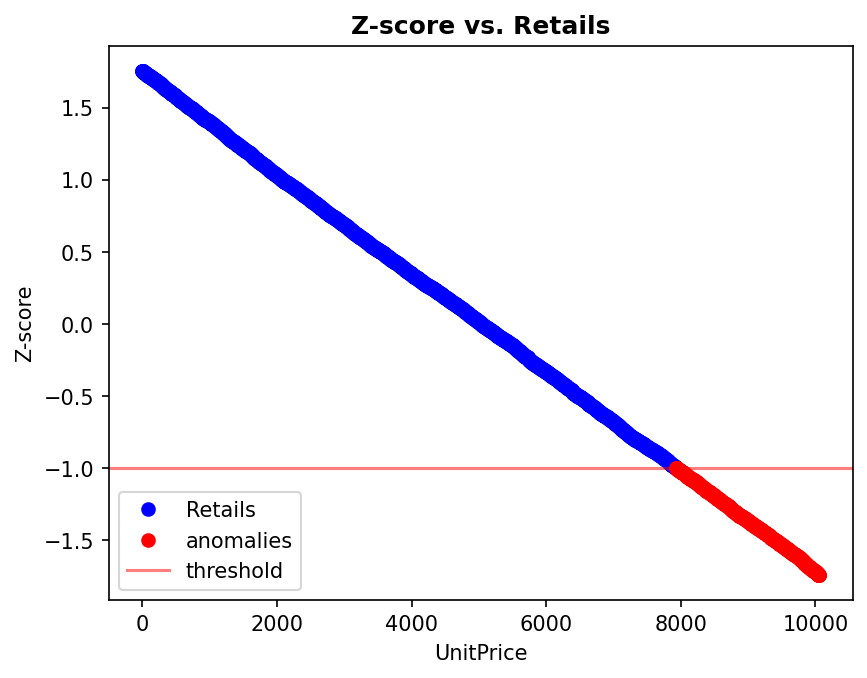

In [122]:
plot_anomaly(ct_test['zscore'], -1)

In [123]:
zscore_anomalies = ct_test[(ct_test['zscore'] < -2)]
zscore_anomalies

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region,zscore


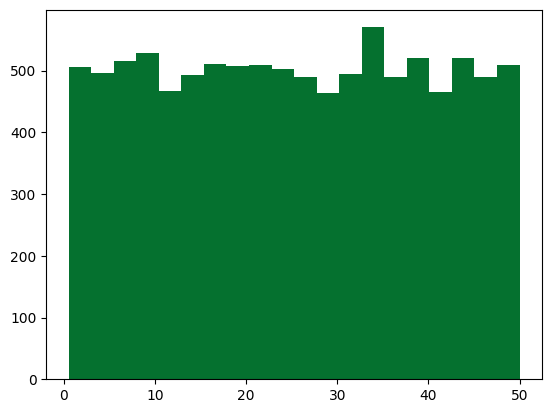

In [124]:
nbins= 20
n_hist, bins_hist, patches_hist = plt.hist(ct_test['UnitPrice'], nbins, density=False,
                           cumulative=False, linewidth=2.0, label='data')

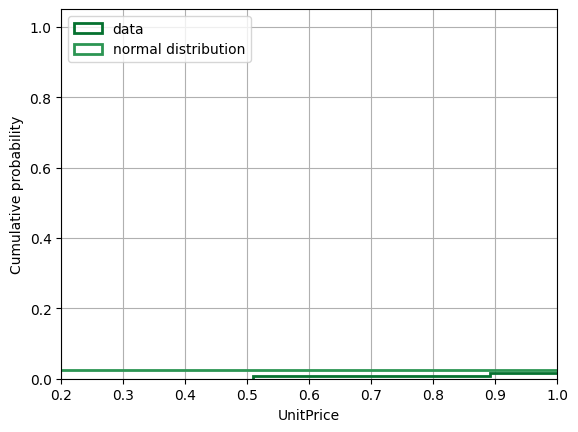

In [125]:
num_bins = 130
normal_dist = [random.gauss(mean_rate, stdev_rate) for _ in range(500)]
n, bins, patches = plt.hist(ct_test['UnitPrice'], num_bins, density=True, histtype='step',
                           cumulative=True, linewidth=2.0, label='data')
plt.hist(normal_dist, num_bins, density=True, histtype='step',
                           cumulative=True, linewidth=2.0, label='normal distribution')
plt.grid(True)
plt.legend(loc='upper left')
axes = plt.gca()
axes.set_xlim([0.2,1.0])
plt.xlabel('UnitPrice')
plt.ylabel('Cumulative probability')
plt.show()

In [126]:
def modified_zscore(data, consistency_correction=1.4826):
    """
    Returns the modified z score and Median Absolute Deviation (MAD) from the scores in data.
    The consistency_correction factor converts the MAD to the standard deviation for a given
    distribution. The default value (1.4826) is the conversion factor if the underlying data
    is normally distributed
    """
    median = np.median(data)
    
    deviation_from_med = np.array(data) - median

    mad = np.median(np.abs(deviation_from_med))
    mod_zscore = deviation_from_med/(consistency_correction*mad)
    return mod_zscore, mad

In [127]:
mad_zscore, mad_unitprice = modified_zscore(ct_test['UnitPrice'])
z_sc_unitprice = ct_test.assign(zscore_median=mad_zscore)

In [128]:
mod_zscore_anomalies = z_sc_unitprice[(z_sc_unitprice['zscore_median'] < -2)]
mod_zscore_anomalies

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region,zscore,zscore_median


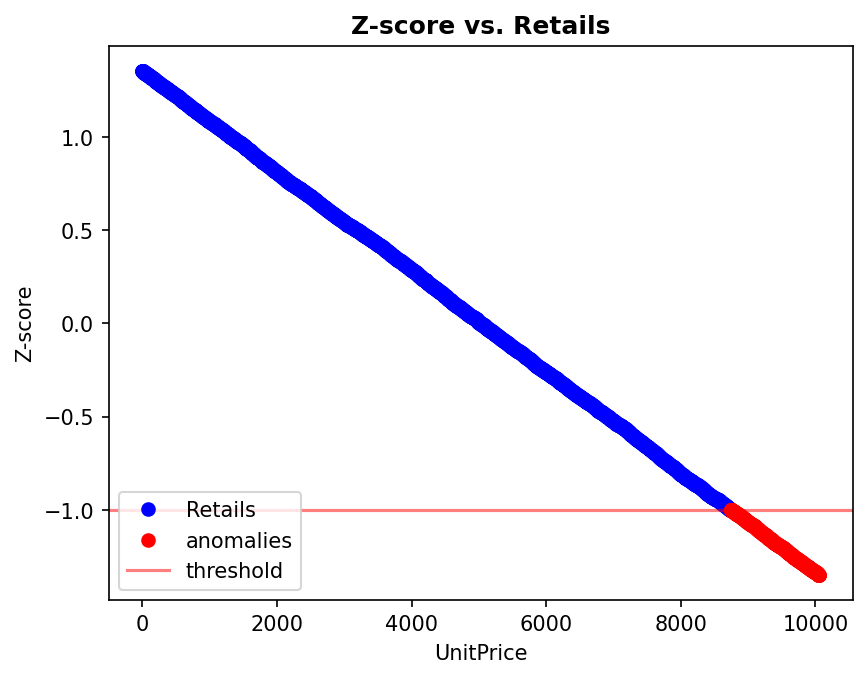

In [129]:

plot_anomaly(z_sc_unitprice['zscore_median'], -1)


In [130]:
z_sc_unitprice['zscore_median'].describe()

count    1.005000e+04
mean     2.467081e-03
std      7.811293e-01
min     -1.349255e+00
25%     -6.732614e-01
50%      9.703609e-17
75%      6.755835e-01
max      1.354718e+00
Name: zscore_median, dtype: float64

In [131]:
z_sc_unitprice['zscore'].describe()

count    1.005000e+04
mean     9.403202e-17
std      1.000050e+00
min     -1.741914e+00
25%     -8.659929e-01
50%      4.516152e-03
75%      8.531929e-01
max      1.754671e+00
Name: zscore, dtype: float64

In [132]:
top_price = pd.read_csv('OnlineRetail5.csv', 
                        encoding='utf-8',  
                        names=['Year', 'Customer name', 'ProductID', 'Price'], skiprows=1)                                                                                
top_price

,Year,Customer name,ProductID,Price
0,2016,Richard Williams,6880,294.40
1,2018,James Walker,4850,921.63
2,2013,Sandra Perez,9419,940.06
3,2016,Sharon Ayers,1573,656.43
4,2015,Steve Meadows,9563,640.09
5,2019,Melanie Pineda,1762,23.35
6,2013,Jillian Berry,4105,615.71
7,2016,Jacqueline Lawson,2695,176.75
8,2020,Benjamin Jackson,8134,28.36
9,2018,Sara Gutierrez,3003,144.94


In [133]:
mean_price = top_price['Price'].mean()
stdev_price = top_price['Price'].std(ddof=0)
print('Mean number of Price is {:.2f}'.format(mean_price))
print('Standard deviation is {:.2f}'.format(stdev_price))

Mean number of Price is 454.31
Standard deviation is 311.44


In [134]:
zscore_price = ss.zscore(top_price['Price'], ddof=0)
top_price = top_price.assign(zscore=zscore_price)
top_price.head(21)

,Year,Customer name,ProductID,Price,zscore
0,2016,Richard Williams,6880,294.40,-0.513455
1,2018,James Walker,4850,921.63,1.500500
2,2013,Sandra Perez,9419,940.06,1.559676
3,2016,Sharon Ayers,1573,656.43,0.648977
4,2015,Steve Meadows,9563,640.09,0.596511
5,2019,Melanie Pineda,1762,23.35,-1.383762
6,2013,Jillian Berry,4105,615.71,0.518230
7,2016,Jacqueline Lawson,2695,176.75,-0.891215
8,2020,Benjamin Jackson,8134,28.36,-1.367676
9,2018,Sara Gutierrez,3003,144.94,-0.993352


In [135]:
def plot_anomaly_price(price_data, threshold):
    price_data = price_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(price_data), len(price_data))
    mask_outlier = (price_data > threshold)
    
    plt.figure(dpi=150)
    plt.plot(ranks[mask_outlier], price_data[mask_outlier], 'o', color='r', label='anomalies')
    plt.plot(ranks[~mask_outlier], price_data[~mask_outlier], 'o', color='b', label='typical customer')
    plt.axhline(threshold,color='r', label='threshold', alpha=0.5)
    plt.legend(loc='upper right')
    plt.title('Z-score vs. customer', fontweight='bold')
    plt.xticks(np.arange(0, 40, step=10.0))
    plt.xlabel('Customer Rank')
    plt.ylabel('Z-score')
    plt.show()

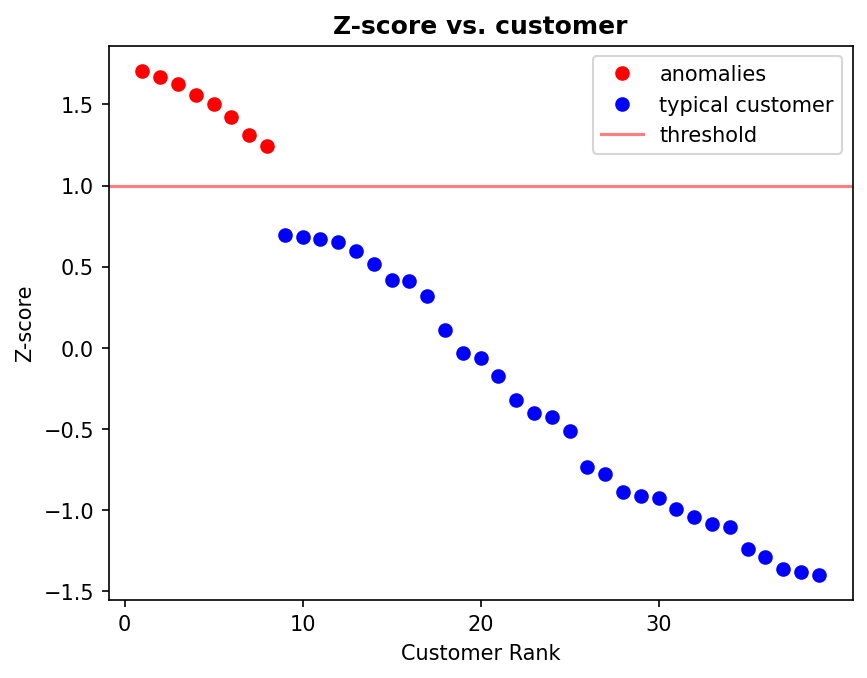

In [136]:
plot_anomaly_price(top_price['zscore'], 1)

In [137]:
zscore_anomalies_customers = top_price[(top_price['zscore'] > 1)]
zscore_anomalies_customers

,Year,Customer name,ProductID,Price,zscore
1,2018,James Walker,4850,921.63,1.500500
2,2013,Sandra Perez,9419,940.06,1.559676
13,2023,Ryan Ewing,9582,973.93,1.668428
15,2020,Stacy Miller,6658,841.24,1.242378
18,2020,Melissa Moore,6473,960.11,1.624054
19,2014,Holly Johnson,5395,896.51,1.419843
27,2018,Gary Lawson,5453,862.75,1.311444
29,2014,Fred Johns,7609,986.04,1.707312


In [138]:
median_price = np.median(top_price['Price'])
median_price

434.94

In [139]:
mod_zscore_price, mad_price = modified_zscore(top_price['Price'])
top_price = top_price.assign(mod_zscore=mod_zscore_price)

In [140]:
def plot_anomaly_price_2(price_data, threshold):
    price_data = price_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(price_data), len(price_data))
    mask_outliers = (price_data > threshold)
    
    plt.figure(dpi=150)
    plt.plot(ranks[mask_outliers], price_data[mask_outliers],'o', color='r',label='anomalies')
    plt.plot(ranks[~mask_outliers], price_data[~mask_outliers],'o', color='b', label='typical customer')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'upper right')
    plt.title('Modified z-score vs. customer', fontweight='bold')
    plt.xticks(np.arange(0, 40, step=2.0))
    plt.xlabel('customer')
    plt.ylabel('Modified z-score')
    plt.show()

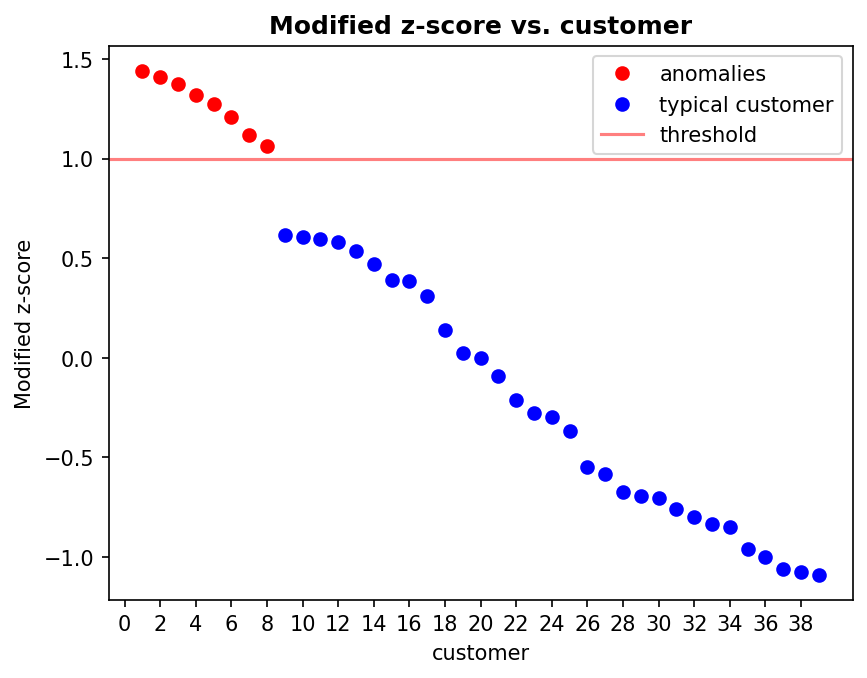

In [141]:
plot_anomaly_price_2(top_price['mod_zscore'], 1)

In [142]:
mod_zscore_anomalies_customers = top_price[(top_price['mod_zscore'] > 1)]
mod_zscore_anomalies_customers

,Year,Customer name,ProductID,Price,zscore,mod_zscore
1,2018,James Walker,4850,921.63,1.500500,1.271420
2,2013,Sandra Perez,9419,940.06,1.559676,1.319566
13,2023,Ryan Ewing,9582,973.93,1.668428,1.408047
15,2020,Stacy Miller,6658,841.24,1.242378,1.061411
18,2020,Melissa Moore,6473,960.11,1.624054,1.371944
19,2014,Holly Johnson,5395,896.51,1.419843,1.205797
27,2018,Gary Lawson,5453,862.75,1.311444,1.117603
29,2014,Fred Johns,7609,986.04,1.707312,1.439683


In [143]:
print('The value of MAD is {:.2f}'.format(mad_price))

The value of MAD is 258.19


---------------------------------------------------------------

In [144]:
pd.set_option('display.max_columns',None)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region
0,370859,44142.0,Remain,3,31/08/2023 13:21,28.08,95496,Australia,No,Female,South
1,455672,37036.0,Officer,19,18/11/2023 21:10,38.73,56057,Australia,Yes,Female,South
2,824795,69973.0,Program,11,03/07/2023 06:52,20.50,55855,Australia,No,Female,East
3,490051,96135.0,Simple,10,06/12/2023 10:04,46.28,34631,Canada,Yes,Female,South
4,549040,24211.0,Particularly,10,23/02/2024 15:18,7.54,46774,UK,Yes,Female,West
...,...,...,...,...,...,...,...,...,...,...,...
10045,861140,20472.0,Current,12,03/11/2023 17:16,16.49,68916,FR,Yes,Male,West
10046,667156,38392.0,All,2,31/12/2023 09:24,16.28,91991,UK,No,Male,East
10047,550005,82248.0,Though,6,27/07/2023 05:04,33.38,89766,United States,No,Male,West
10048,982069,23938.0,Lawyer,14,10/10/2023 01:46,47.46,87345,Germany,No,Female,West


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10050 non-null  int64  
 1   StockCode    9949 non-null   float64
 2   Description  10038 non-null  object 
 3   Quantity     10050 non-null  int64  
 4   InvoiceDate  10050 non-null  object 
 5   UnitPrice    10050 non-null  float64
 6   CustomerID   10050 non-null  int64  
 7   Country      10050 non-null  object 
 8   IsPromotion  10050 non-null  object 
 9   Sex          10050 non-null  object 
 10  Region       10050 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 863.8+ KB


In [146]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

InvoiceNo        0
StockCode      101
Description     12
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
IsPromotion      0
Sex              0
Region           0
dtype: int64
Missing values distribution: 
InvoiceNo      0.000000
StockCode      0.010050
Description    0.001194
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
IsPromotion    0.000000
Sex            0.000000
Region         0.000000
dtype: float64


In [147]:
# #Checking for duplicates
print(new_df.duplicated().any()) 

True


In [148]:
print(new_df.duplicated())
print(new_df.shape) 

0        False
1        False
2        False
3        False
4        False
         ...  
10045    False
10046    False
10047    False
10048    False
10049    False
Length: 10050, dtype: bool
(10050, 11)


In [149]:
#Replacing string values with integer 
new_df["Sex"] = new_df["Sex"].replace({"Male":"1", "Female":"0"}) 
print(new_df.head())

   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID    Country IsPromotion Sex Region  
0       95496  Australia          No   0  South  
1       56057  Australia         Yes   0  South  
2       55855  Australia          No   0   East  
3       34631     Canada         Yes   0  South  
4       46774         UK         Yes   0   West  


In [150]:
#Finding unique values in "Region" 
print(new_df["Region"].unique()) 

['South' 'East' 'West' 'North']


In [151]:
new_df['Region'] = new_df['Region'].replace({'East':'0', 'West':'1', 'North':'2', 'South':'3'})
print(new_df.head())

   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID    Country IsPromotion Sex Region  
0       95496  Australia          No   0      3  
1       56057  Australia         Yes   0      3  
2       55855  Australia          No   0      0  
3       34631     Canada         Yes   0      3  
4       46774         UK         Yes   0      1  


In [152]:
#Describing data after preprocessing 
print(new_df.shape) 
print(new_df.head())

(10050, 11)
   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID    Country IsPromotion Sex Region  
0       95496  Australia          No   0      3  
1       56057  Australia         Yes   0      3  
2       55855  Australia          No   0      0  
3       34631     Canada         Yes   0      3  
4       46774         UK         Yes   0      1  


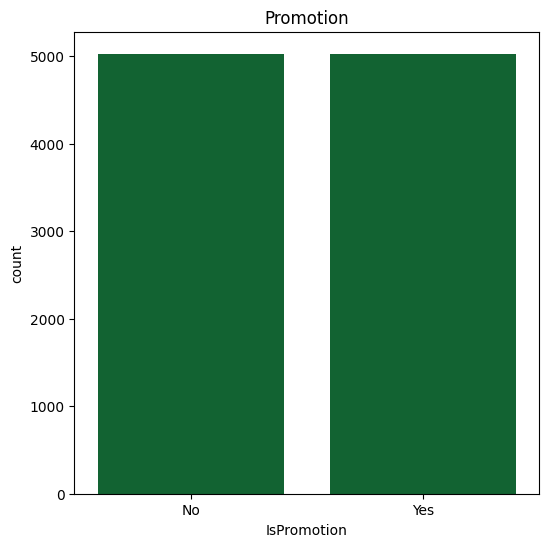

In [153]:
new_df.IsPromotion.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='IsPromotion', data=new_df)
plt.title('Promotion')
plt.show()

In [154]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [155]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [156]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [157]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (700, 2)
Number transactions y_train dataset:  (700,)
Number transactions X_test dataset:  (300, 2)
Number transactions y_test dataset:  (300,)


--------------------------------------------------------------

In [158]:
df = pd.read_csv("OnlineRetail4.csv")
df1 = df

In [159]:
#define x and y
x = df1[['InvoiceNo', 'CustomerID', 'StockCode', 'UnitPrice']] 
y = df1['IsPromotion']

In [160]:
#import classification algos and cross validation 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

In [161]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
x_imputed = imputer.fit_transform(x)

In [162]:
#Cross validation for SVC 
cross_val_score(SVC(), x_imputed, y, cv=5)

array([0.48358209, 0.47313433, 0.48756219, 0.49900498, 0.49353234])

In [163]:
#Cross validation for Decision Tree 
cross_val_score(DecisionTreeClassifier(), x_imputed, y, cv = 5)

array([0.49651741, 0.49452736, 0.50845771, 0.51641791, 0.50597015])

In [164]:
#Cross validation for Logistic regression 
cross_val_score(LogisticRegression(), x_imputed, y, cv = 5)

array([0.48557214, 0.48905473, 0.49303483, 0.48557214, 0.49850746])

In [165]:
#Cross validation for Random forest 
cross_val_score(RandomForestClassifier(n_estimators=50), x_imputed, y, cv = 5)

array([0.50547264, 0.5159204 , 0.50696517, 0.49651741, 0.51293532])

In [166]:
#Cross validation for KNN 
cross_val_score(KNeighborsClassifier(),x_imputed, y ,cv = 5)

array([0.50497512, 0.50199005, 0.49701493, 0.47313433, 0.49353234])

In [167]:
#Train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_imputed, y, test_size = 0.2)

In [168]:
#Model design
model = RandomForestClassifier() 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [169]:
#Confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
cm

array([[515, 464],
       [561, 470]], dtype=int64)

In [170]:
#Accuracy
print(accuracy_score(y_test, model.predict(X_test)))

0.4900497512437811


-------------------------------------------------------------

In [171]:
df = pd.read_csv("OnlineRetail4.csv") 
df1 = df
from scipy import stats 
data = df1["UnitPrice"] 
data

0        28.08
1        38.73
2        20.50
3        46.28
4         7.54
         ...  
10045    16.49
10046    16.28
10047    33.38
10048    47.46
10049    12.67
Name: UnitPrice, Length: 10050, dtype: float64

In [172]:
#t-test for charges 
stats.ttest_1samp(data, 0) 

TtestResult(statistic=177.05534413162096, pvalue=0.0, df=10049)

In [173]:
#t-test for charges 
stats.ttest_1samp(data, 1)

TtestResult(statistic=170.04329412484185, pvalue=0.0, df=10049)

---------------------------------------------------------------

In [174]:
#import classification algo
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [175]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
x_imputed = imputer.fit_transform(x)

In [176]:
df = pd.read_csv("OnlineRetail4.csv") 
df5 = df
x = df5[['InvoiceNo', 'StockCode', 'UnitPrice', 'Quantity']] 
y = df5['IsPromotion']

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_imputed,y, test_size = 0.2)

In [178]:
#Classification model
model = LogisticRegression() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 

In [179]:
#Accuracy and Confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, model.predict(X_test)))


0.5203980099502488


---------------------------------------------------------------------

In [180]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
x_imputed = imputer.fit_transform(x)

In [181]:
# use pandas to import csv file
df = pd.read_csv("OnlineRetail4.csv")
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region
0,370859,44142.0,Remain,3,31/08/2023 13:21,28.08,95496,Australia,No,Female,South
1,455672,37036.0,Officer,19,18/11/2023 21:10,38.73,56057,Australia,Yes,Female,South
2,824795,69973.0,Program,11,03/07/2023 06:52,20.50,55855,Australia,No,Female,East
3,490051,96135.0,Simple,10,06/12/2023 10:04,46.28,34631,Canada,Yes,Female,South
4,549040,24211.0,Particularly,10,23/02/2024 15:18,7.54,46774,United Kingdom,Yes,Female,West
...,...,...,...,...,...,...,...,...,...,...,...
10045,861140,20472.0,Current,12,03/11/2023 17:16,16.49,68916,France,Yes,Male,West
10046,667156,38392.0,All,2,31/12/2023 09:24,16.28,91991,United Kingdom,No,Male,East
10047,550005,82248.0,Though,6,27/07/2023 05:04,33.38,89766,United States,No,Male,West
10048,982069,23938.0,Lawyer,14,10/10/2023 01:46,47.46,87345,Germany,No,Female,West


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10050 non-null  int64  
 1   StockCode    9949 non-null   float64
 2   Description  10038 non-null  object 
 3   Quantity     10050 non-null  int64  
 4   InvoiceDate  10050 non-null  object 
 5   UnitPrice    10050 non-null  float64
 6   CustomerID   10050 non-null  int64  
 7   Country      10050 non-null  object 
 8   IsPromotion  10050 non-null  object 
 9   Sex          10050 non-null  object 
 10  Region       10050 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 863.8+ KB


In [183]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

InvoiceNo        0
StockCode      101
Description     12
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
IsPromotion      0
Sex              0
Region           0
dtype: int64
Missing values distribution: 
InvoiceNo      0.000000
StockCode      0.010050
Description    0.001194
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
IsPromotion    0.000000
Sex            0.000000
Region         0.000000
dtype: float64


In [184]:
#Replacing string values with integer 
new_df.replace({"Sex": {"Male": "1", "Female": "0"}}, inplace=True)
print(new_df.head())

   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID         Country IsPromotion Sex Region  
0       95496       Australia          No   0  South  
1       56057       Australia         Yes   0  South  
2       55855       Australia          No   0   East  
3       34631          Canada         Yes   0  South  
4       46774  United Kingdom         Yes   0   West  


In [185]:
#Finding unique values in "Region" 
print(new_df["Region"].unique()) 

['South' 'East' 'West' 'North']


In [186]:
new_df.replace({"Region": {'East': '0', 'West': '1', 'North': '2', 'South': '3'}}, inplace=True)
print(new_df.head())

   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID         Country IsPromotion Sex Region  
0       95496       Australia          No   0      3  
1       56057       Australia         Yes   0      3  
2       55855       Australia          No   0      0  
3       34631          Canada         Yes   0      3  
4       46774  United Kingdom         Yes   0      1  


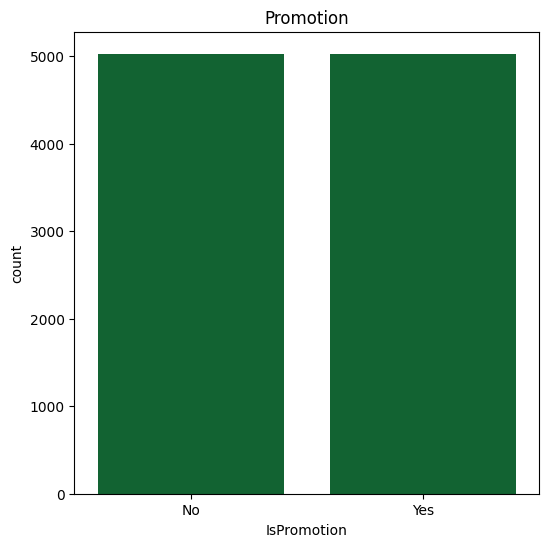

In [187]:
new_df.IsPromotion.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='IsPromotion', data=new_df)
plt.title('Promotion')
plt.show()

In [188]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [189]:
from sklearn.model_selection import train_test_split
  
# split into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [190]:
#KNN classifer
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
#Accuracy and Confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, model.predict(X_test))) 
cm

0.98


array([[ 10,   5],
       [  0, 235]], dtype=int64)

In [191]:
#Naive Bayes Classifier
x = new_df.drop(["IsPromotion","Description","InvoiceDate","Country","Sex","Region"], axis = 1)
y = new_df.IsPromotion.values
y = new_df.Description.values
y = new_df.InvoiceDate.values
y = new_df.Country.values
y = new_df.Sex.values
y = new_df.Region.values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size = 0.3, random_state = 42)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.24776119402985075


In [192]:
feature_cols = ['InvoiceNo', 'Sex', 'Quantity', 'UnitPrice','Region','StockCode']


In [193]:
#split dataset in features and target variable
feature_cols = ['InvoiceNo', 'Sex', 'Quantity', 'UnitPrice','Region','StockCode']
X = new_df[feature_cols] # Features
y = new_df.IsPromotion # Target variable

In [194]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.3, random_state=1)

In [195]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [196]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.490547263681592


------------------------------------------------------------------


In [197]:

sns.set()
from sklearn.cluster import KMeans

In [198]:
data = pd.read_csv("OnlineRetail4.csv")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region
0,370859,44142.0,Remain,3,31/08/2023 13:21,28.08,95496,Australia,No,Female,South
1,455672,37036.0,Officer,19,18/11/2023 21:10,38.73,56057,Australia,Yes,Female,South
2,824795,69973.0,Program,11,03/07/2023 06:52,20.50,55855,Australia,No,Female,East
3,490051,96135.0,Simple,10,06/12/2023 10:04,46.28,34631,Canada,Yes,Female,South
4,549040,24211.0,Particularly,10,23/02/2024 15:18,7.54,46774,United Kingdom,Yes,Female,West
...,...,...,...,...,...,...,...,...,...,...,...
10045,861140,20472.0,Current,12,03/11/2023 17:16,16.49,68916,France,Yes,Male,West
10046,667156,38392.0,All,2,31/12/2023 09:24,16.28,91991,United Kingdom,No,Male,East
10047,550005,82248.0,Though,6,27/07/2023 05:04,33.38,89766,United States,No,Male,West
10048,982069,23938.0,Lawyer,14,10/10/2023 01:46,47.46,87345,Germany,No,Female,West


In [199]:
# Using K-Means Clustering
x = data.iloc[:,5:7] # 1st for rows and second for columns
x

,UnitPrice,CustomerID
0,28.08,95496
1,38.73,56057
2,20.50,55855
3,46.28,34631
4,7.54,46774
...,...,...
10045,16.49,68916
10046,16.28,91991
10047,33.38,89766
10048,47.46,87345


In [200]:
kmeans = KMeans(3) # Creating three clusters
kmeans.fit(x)

KMeans(n_clusters=3)

In [201]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 0, 0, ..., 2, 2, 2])

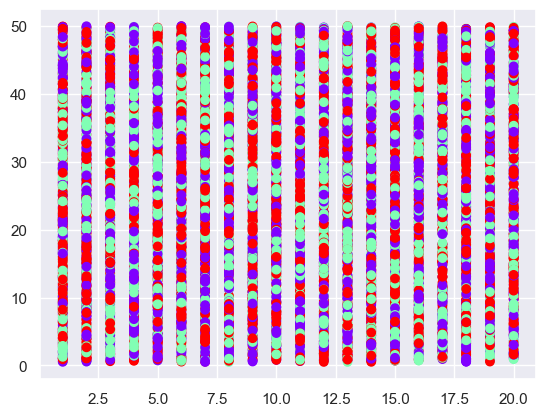

In [202]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Quantity'],data_with_clusters['UnitPrice'],c=data_with_clusters['Clusters'],cmap='rainbow')